<a href="https://colab.research.google.com/github/saritmaitra/Optimizatiion_problem/blob/main/pulp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest
from pyforest import *
from scipy.optimize import minimize, LinearConstraint
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from numpy import arange
plt.style.use('ggplot')
from matplotlib.pyplot import *
! pip install pulp
import pulp
from pulp import *

A car company produces 2 models, model A and model B. Long-term projections indicate an expected demand of at least 100 model A cars and 80 model B cars each day. Because of limitations on production capacity, no more than 200 model A cars and 170 model B cars can be made daily. To satisfy a transportation contract, a total of at least 200 cars much be transported each day. If each model A car sold results in a dollar 2000 loss, but each model B car produces a dollar 5000  profit, how many of each type should be made daily to maximize net profits?

In [ ]:
#car models - A & B

#demand: A >= 100 ; B >= 80

#produce: A <= 200 ; B <= 170

#So, we can conclude that: 200 >= A >= 100 and 170 >= B >= 80

#transportation: A + B >= 200

#objective function: ( z = 5000B - 2000A )

### visualization of the problem

A car company produces 2 models, model A and model B. Long-term projections indicate an expected demand of at least 100 model A cars and 80 model B cars each day. Because of limitations on production capacity, no more than 200 model A cars and 170 model B cars can be made daily. To satisfy a transportation contract, a total of at least 200 cars much be transported each day. If each model A car sold results in a dollar 2000 loss, but each model B car produces a dollar 5000 profit, how many of each type should be made daily to maximize net profits?

In [ ]:
# create the LP object, set up as a maximization problem
prob = LpProblem('Car_Production_Problem', LpMaximize)

# Setting up decision variables:
A = LpVariable("A", lowBound = 100, upBound = 200, cat='Integer')   # 100 <= A <= 200
B = LpVariable("B", lowBound = 80, upBound = 170, cat='Integer') # 80 <= B <= 170

# Now we add in the objective function:

# considering each model A car sold results in a dollar 2000 loss, but each model B car produces a dollar 5000 profit
profit = 5000*B - 2000*A  
prob += profit  # here's where we actually add it to the obj function

# Now the constraints:
prob += A >= 100 # expected demand of at least 100 model A cars
prob += B >= 80 # expected demand of at least 80 model B cars
prob += A + B >= 200 # total of at least 200 cars much be transported each day
prob += A <= 200 # no more than 200 model A cars
prob += B <= 170 # no more than 170 model A cars

# Let's print out the problem and make sure we have everything:
print(prob)

Car_Production_Problem:
MAXIMIZE
-2000*A + 5000*B + 0
SUBJECT TO
_C1: A >= 100

_C2: B >= 80

_C3: A + B >= 200

_C4: A <= 200

_C5: B <= 170

VARIABLES
100 <= A <= 200 Integer
80 <= B <= 170 Integer



As we can see the objective function is 2×1 + 3×2, as documented in the initial mathematical problem statement in scalar syntax. The constraints are marked with _C1 and _C2. They too are consistent with the mathematical problem statement at the beginning of this post. Furthermore, it is correct that x1 and x2 are continuous and not discrete optimization variables.

In [ ]:
# now we solve the Linear Programming
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == LpStatusOptimal

print ('\nPrinting the Results: \n')
print('printing status of the LP problem: ', LpStatus[optimization_result])
 
# print the results A = 100, B = 170
print('Maximum Profit Gained: $', profit)
print('\n Number of Model A Cars: ',value(A))
print('\n Number of Model B Cars: ',value(B))
print('\nOptimal solution (profit maximization): $', value(prob.objective))


Printing the Results: 

printing status of the LP problem:  Optimal
Maximum Profit Gained: $ -2000*A + 5000*B

 Number of Model A Cars:  100.0

 Number of Model B Cars:  170.0

Optimal solution (profit maximization): $ 650000.0


### Checking the answer
We can also visualize this problem and verify that the answer we have come up with makes sense.

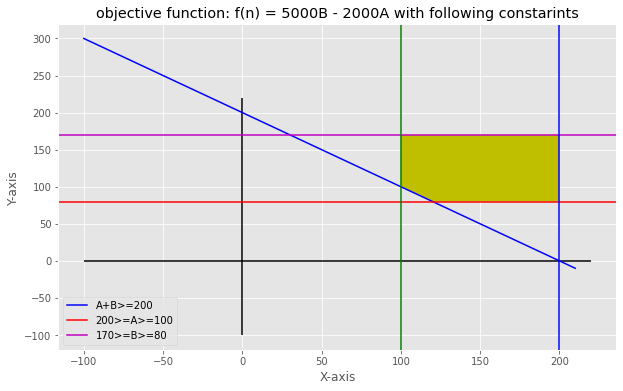

In [ ]:
plt.figure(figsize = (10,6))
A = arange(-100, 220, 10)
B = arange(-100, 220, 10)

# constraint equation
B1 = 200.0 - A

xlim = (-100, 220)
ylim= (-100, 220)
hlines(0, -100, 220, color = 'k')
vlines(0, -100, 220, color = 'k')
grid(True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#Plotting graph
plot(A, B1, color = 'b')
axhline(y = 80, color = 'r')
axhline(y = 170, color = 'm')
axvline(x = 200, color = 'b')
axvline(x = 100, color = 'g')

plt.title('objective function: f(n) = 5000B - 2000A with following constarints')
plt.legend(['A+B>=200','200>=A>=100','170>=B>=80'])

# get the co-ordinates of intersection points by mere visualisation
A = [200.0,100.0, 100.0, 120.0,200.0]
B = [170.0, 170.0, 100.0, 80.0, 80.0]
fill(A,B,'y')
plt.show()



The highlighted area shows the set of decisions about A and B which satisfy all of the constraints — this is the feasible region. 

In [ ]:
#Getting Solution
checker = 0
for i,j in zip(A,B):
    print('\n calculating for point: A = {0:f} and B = {1:f}' .format(i,j))
    print('solution for f(n) = ', 5000*j-2000*i)
    if(checker <= (5000*j-2000*i)):
       checker = (5000*j-2000*i)
       X,Y = i,j

print('\n the maximum profit f(n) = ${0:f} @ A = {1:f} and B = {2:f}' .format(checker,X,Y))


 calculating for point: A = 200.000000 and B = 170.000000
solution for f(n) =  450000.0

 calculating for point: A = 100.000000 and B = 170.000000
solution for f(n) =  650000.0

 calculating for point: A = 100.000000 and B = 100.000000
solution for f(n) =  300000.0

 calculating for point: A = 120.000000 and B = 80.000000
solution for f(n) =  160000.0

 calculating for point: A = 200.000000 and B = 80.000000
solution for f(n) =  0.0

 the maximum profit f(n) = $650000.000000 @ A = 100.000000 and B = 170.000000
